<a href="https://colab.research.google.com/github/prakash-bisht/NN_architecture_from-_scratch/blob/main/convolution_architectures_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AlexNet

In [ ]:
# The network consists of 5 Convolutional (CONV) layers and 3 Fully Connected (FC) layers.
# The activation used is the Rectified Linear Unit (ReLU)

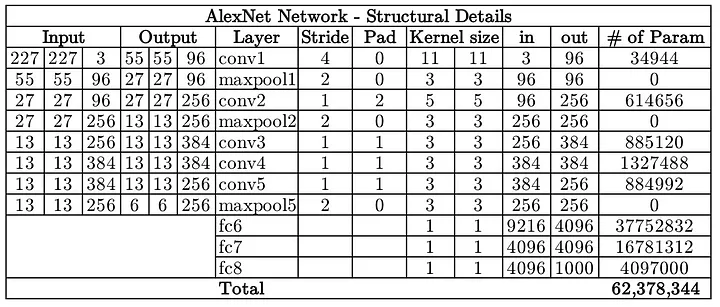

In [ ]:
from IPython.display import Image
Image(filename='/content/alexnet.png')

#vgg16

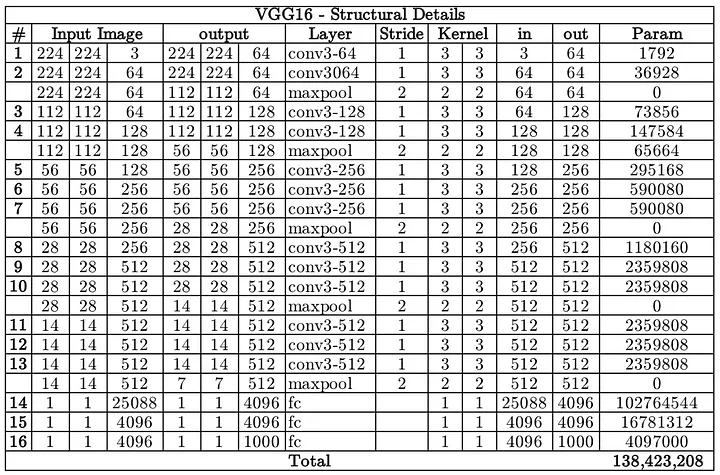

In [ ]:
from IPython.display import Image
Image(filename='/content/vgg.png')

In [ ]:
# VGG16 has a total of 138 million parameters. 
# The important point to note here is that all the conv kernels are of size 3x3 
# and maxpool kernels are of size 2x2 with a stride of two.


#resnet18

In [ ]:
# As we make the CNN deeper, the derivative when back-propagating to the initial layers
# becomes almost insignificant in value.
# ResNet addresses this network by introducing two types of ‘shortcut connections’:
# Identity shortcut and Projection shortcut.

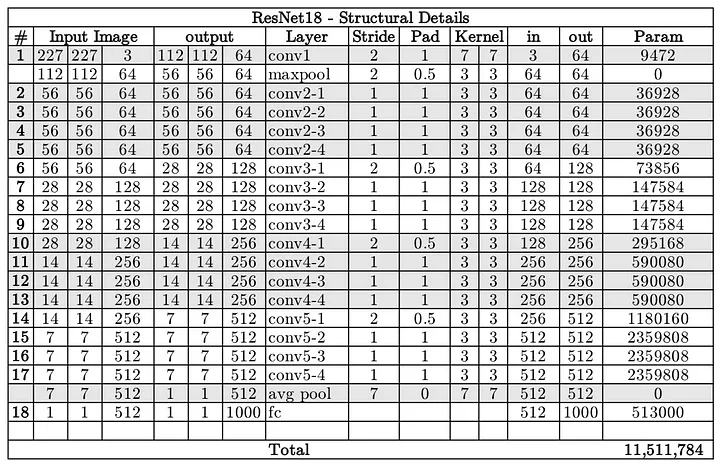

In [ ]:
from IPython.display import Image
Image(filename='/content/resnet18.png')

In [ ]:
# Resnet18 has around 11 million trainable parameters. 
# It consists of CONV layers with filters of size 3x3 (just like VGGNet). 
# Only two pooling layers are used throughout the network one at the beginning and 
# the other at the end of the network. Identity connections are between every two CONV layers.
# The solid arrows show identity shortcuts where the dimension of the input and output is the same, 
# while the dotted ones present the projection connections where the dimensions differ.

In [ ]:
# Instead of learning the mapping from x →F(x), the network learns the mapping from x → F(x)+G(x). 
# When the dimension of the input x and output F(x) is the same, the function G(x) = x is an identity function
# and the shortcut connection is called Identity connection. 
# The identical mapping is learned by zeroing out the weights in the intermediate layer during training since 
# it's easier to zero out the weights than push them to one.

# For the case when the dimensions of F(x) differ from x (due to stride length>1 in the CONV layers in between), 
# the Projection connection is implemented rather than the Identity connection. 
# The function G(x) changes the dimensions of input x to that of output F(x). 

# Two kinds of mapping were considered in the original paper.

# Non-trainable Mapping (Padding): The input x is simply padded with zeros to make the dimension match that of F(x)
# Trainable Mapping (Conv Layer): 1x1 Conv layer is used to map x to G(x).


#inception

In [ ]:
# Each inception module consists of four operations in parallel

# 1x1 conv layer
# 3x3 conv layer
# 5x5 conv layer
# max pooling

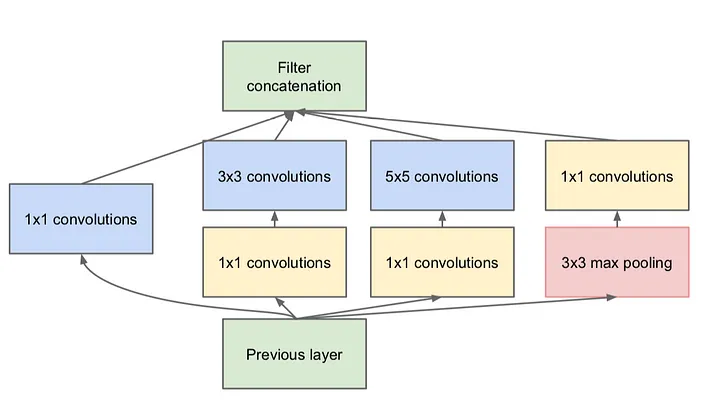

In [ ]:
from IPython.display import Image
Image(filename='/content/inception.png')

In [ ]:
#  Inception increases the network space from which the best network is to be chosen via training. 
#  Each inception module can capture salient features at different levels. 
#  Global features are captured by the 5x5 conv layer, while the 3x3 conv layer is prone to capturing distributed features. 
#  The max-pooling operation is responsible for capturing low-level features that stand out in a neighborhood.
#   At a given level, all of these features are extracted and concatenated before it is fed to the next layer. 
#   We leave for the network/training to decide what features hold the most values and weight accordingly. 
#   Say if the images in the data-set are rich in global features without too many low-level features, 
#   then the trained Inception network will have very small weights corresponding to the 3x3 conv kernel 
#   as compared to the 5x5 conv kernel.

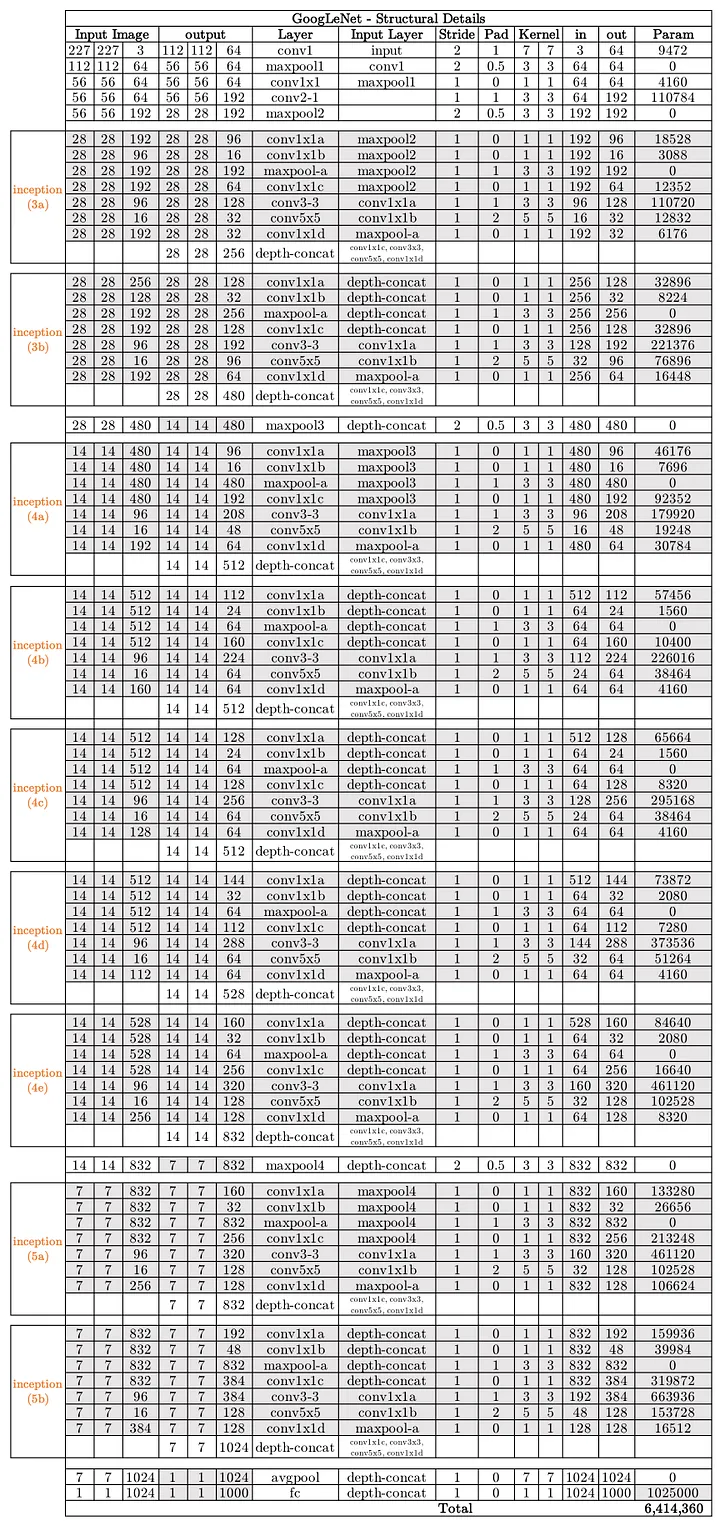

In [ ]:
from IPython.display import Image
Image(filename='/content/googlenet.png')

#comparision_all_4

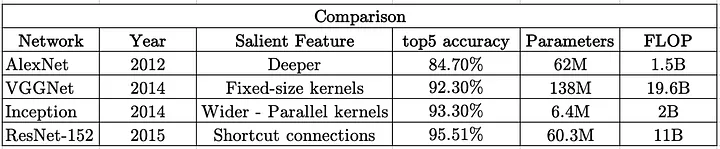

In [ ]:
from IPython.display import Image
Image(filename='/content/flop.png')

#efficient-net

In [ ]:
!pip install tf-nightly-gpu

In [ ]:
# The first thing is any network is its stem after which all the experimenting with the architecture starts
# which is common in all the eight models and the final layers.

In [ ]:
'correction------ after normalizatin re Rescaling then Zero Padding'

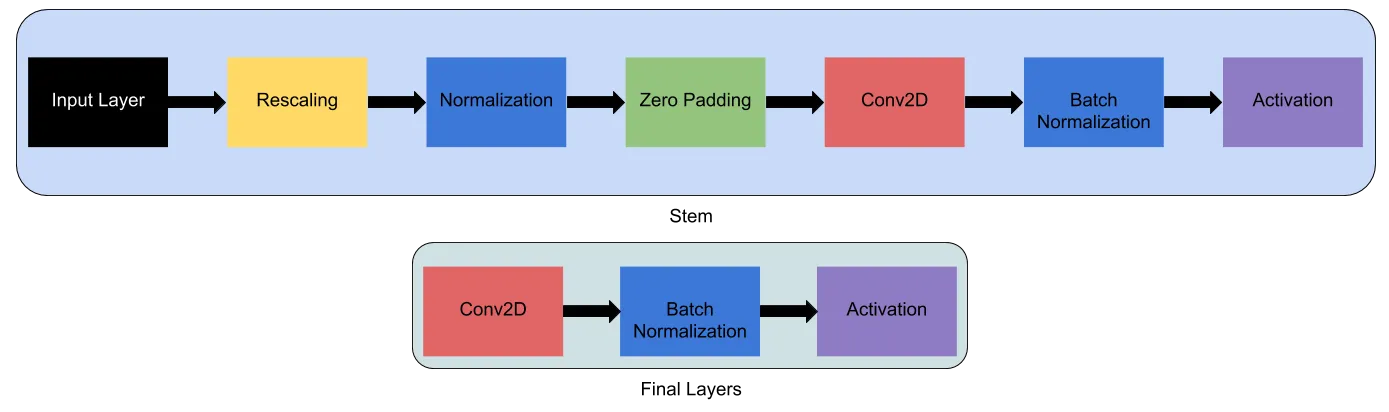

In [ ]:
from IPython.display import Image
Image(filename='/content/stem.png')

In [ ]:
import tensorflow as tf
IMG_SHAPE = (224, 224, 3)
model0 = tf.keras.applications.EfficientNetB0(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
tf.keras.utils.plot_model(model0) # to draw and visualize
model0.summary() # to see the list of layers and parameters

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

In [ ]:
# If you count the total number of layers in EfficientNet-B0 the total is 237 and in 
# EfficientNet-B7 the total comes out to 813!! But don’t worry all these layers can be made from 5 modules shown below
# and the stem above

In [ ]:
'correction -- module 2 will start with conv2d not with depthwise conv2d'

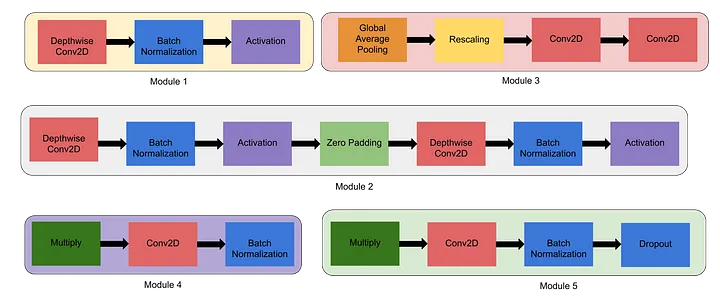

In [ ]:
from IPython.display import Image
Image(filename='/content/module 5.png')

In [ ]:
# Module 1 — This is used as a starting point for the sub-blocks.
# Module 2 — This is used as a starting point for the first sub-block of all the 7 main blocks except the 1st one.
# Module 3 — This is connected as a skip connection to all the sub-blocks.
# Module 4 — This is used for combining the skip connection in the first sub-blocks.
# Module 5 — Each sub-block is connected to its previous sub-block in a skip connection and they are combined using this module.

In [ ]:
#These modules are further combined to form sub-blocks which will be used in a certain way in the blocks.

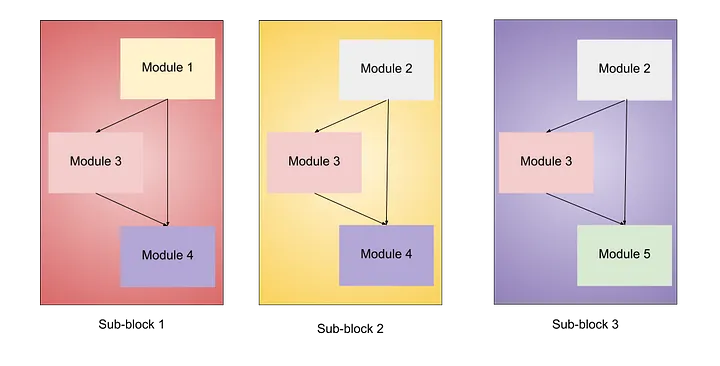

In [ ]:
from IPython.display import Image
Image(filename='/content/sub_block.png')

In [ ]:
# Sub-block 1 — This is used only used as the first sub-block in the first block.
# Sub-block 2 — This is used as the first sub-block in all the other blocks.
# Sub-block 3 — This is used for any sub-block except the first one in all the blocks.

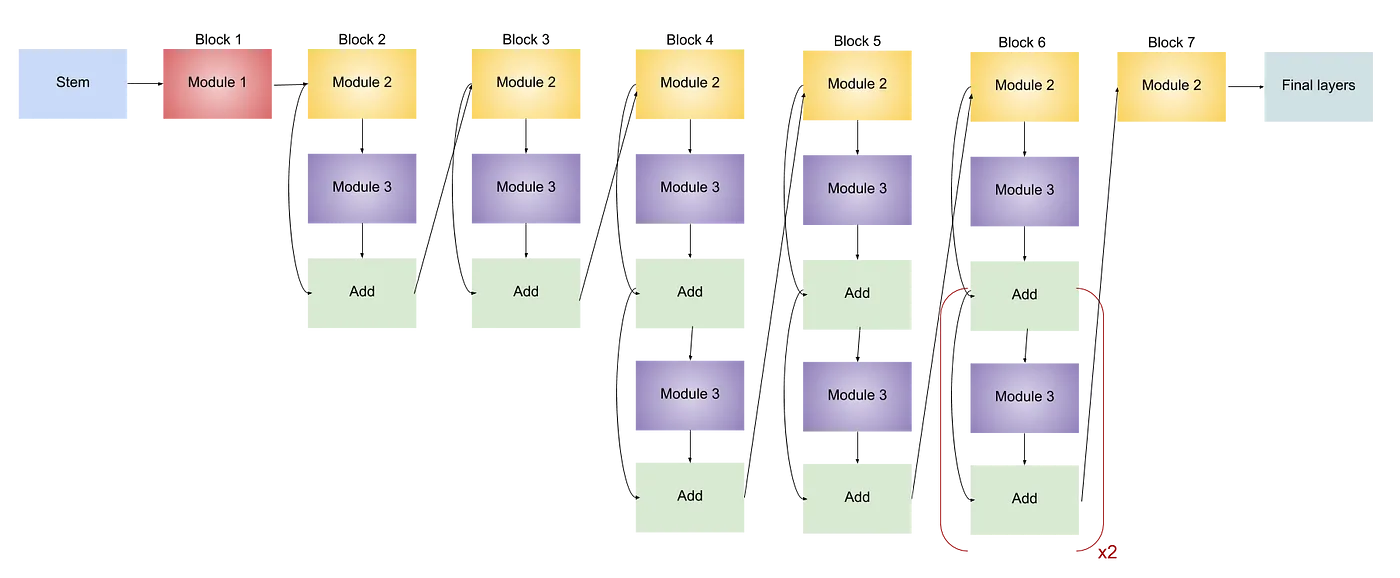

In [ ]:
#EfficientNet-B0
from IPython.display import Image
Image(filename='/content/bo.png')

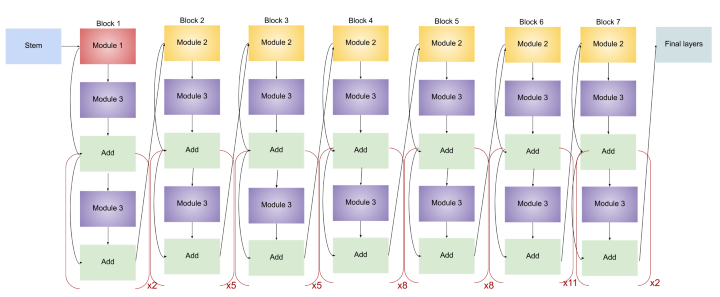

In [ ]:
#EfficientNet-B7
from IPython.display import Image
Image(filename='/content/b7.png')